## Example: Artificial Neural Network using Keras

This exercise is adapted from the book Hands-on Data Science for Marketing: Chapter Customer churn and retention.

Dataset is provided by IBM Watson. You can also find it here: https://www.kaggle.com/zagarsuren/telecom-churn-dataset-ibm-watson-analytics. A copy of the data is stored in this week's Data folder.

Note for lecturer: 
* Link to the book via SafariBooksOnline - https://learning.oreilly.com/library/view/hands-on-data-science/9781789346343/b984726e-af92-4525-8a1f-7343a9b2ac76.xhtml
* Sample answer in github: https://github.com/yoonhwang/hands-on-data-science-for-marketing/blob/master/ch.11/python/CustomerRetention.ipynb


**Step 1:** first load the data into a dataframe

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load the dataset into the dataframe df
df = pd.read_excel('../Data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

**Step 2:** Show the first 10 lines of the contents in df

In [74]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes


In [75]:
df.shape

(7043, 21)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Q:** How many variables/attributes are there in the dataset? which is the target variable?

**Step 3:** Target variable encoding: As you may have noticed from the data, the target variable, Churn, has two values: Yes and No. Please encode these values as 1 for Yes and 0 for No. 

In [77]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

**Q:** What is the overall churn rate? Do you find the churn rate worth paying attention to?

In [78]:
len(df['Churn'])

7043

In [79]:
len(df[df['Churn']==1])

1869

In [80]:
#churn rate = how many customers churn / total customers

print(len(df[df['Churn']==1])/len(df['Churn']))

0.2653698707936959


**Handling missing values in the TotalCharges column:** If you looked through the TotalCharges column in the dataset, you may have noticed that there are some records with no TotalCharges values. 

Since there are only 11 records with missing TotalCharges values, it is safe to simply ignore and drop those records with missing values.

**Step 4:** Remove entries that have missing TotalCharges values.

In [81]:
# checking null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [82]:
# there are 11 rows are blank/ space in TotalCharges column
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [83]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [84]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
df.shape

(7043, 21)

In [67]:
df.dropna().shape

(7032, 21)

In [68]:
df = df.dropna()

**Transforming continuous variables:** The next step is to scale the continuous variables. 

**Step 5:** Take a look at the summary statistics for continuous variables tenure, MonthlyCharges and TotalCharges


In [86]:
df[['tenure', 'MonthlyCharges','TotalCharges']].head(10)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


In [69]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['TotalCharges'] = np.log(df['TotalCharges'])

C:\Users\kexin_lee\Anaconda3\envs\python-dscourse\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Step 6:** Normalize the variables tenure, MonthlyCharges and TotalCharges so that it has a mean of 0 and standard deviation of 1 (approximately)

In [87]:
# Normalisation brings all values between 0-1
scale_cols = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [92]:
df[scale_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,0.449599,0.462803,0.261309
std,0.341104,0.299403,0.261571
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.044155
50%,0.402778,0.518408,0.159090
75%,0.763889,0.712438,0.435719
max,1.000000,1.000000,1.000000


In [93]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [94]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

**One-hot encoding categorical variables:** As you can see from the data, there are many categorical variables. Let's first take a look at the number of unique values each column has. After that, use one-hot encoding technique to turn these columns into values of 0s and 1s. (Tip: read up One-hot encoding online like this: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)


**Step 7:** Find out the number of unique values in each column.

In [95]:
for col in df:
    print(col+": "+str(df[col].nunique()))

customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6530
Churn: 2


**Q:** Which are the variables with 2 to 4 unique values?

**Q:** Find out the distributions of the values stored in i) Gender ii) InternetService and iii) PaymentMethod. 

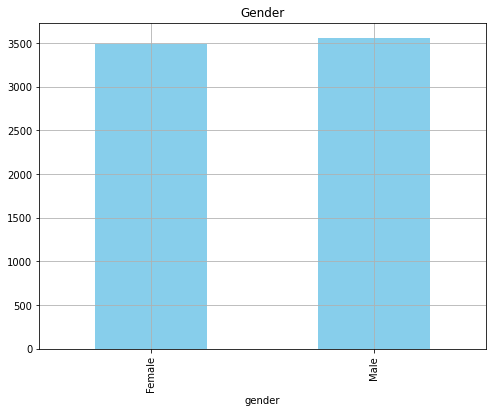

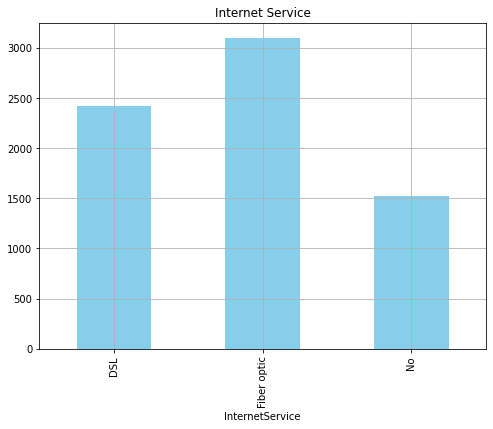

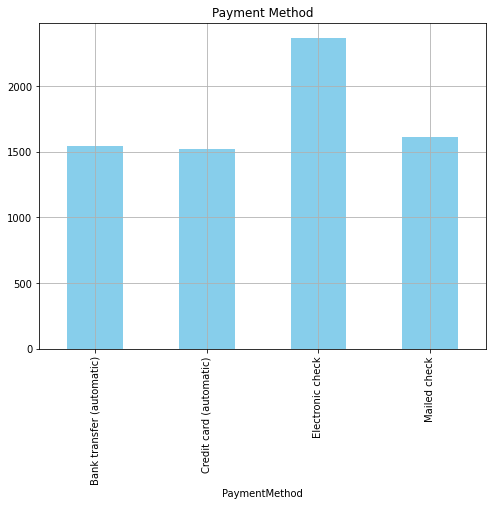

In [96]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

**Step 8:** Perform One-hot encoding to all columns except tenure, MonthlyCharges, TotalCharges and Churn as well as those with lower than 5 unique values in respective columns.

In [97]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

**Step 9:** Create features and target_var consisting the correct corresponding column names from sample_set

In [98]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

In [99]:
sample_set.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
tenure,0.013889,0.472222,0.027778,0.625000,0.027778,0.111111,0.305556,0.138889,0.388889,0.861111,...,0.527778,0.930556,0.263889,0.166667,1.000000,0.333333,1.000000,0.152778,0.055556,0.916667
MonthlyCharges,0.115423,0.385075,0.354229,0.239303,0.521891,0.809950,0.704975,0.114428,0.861194,0.377114,...,0.509950,0.842786,0.601493,0.421891,0.028856,0.662189,0.845274,0.112935,0.558706,0.869652
TotalCharges,0.001275,0.215867,0.010310,0.210241,0.015330,0.092511,0.222779,0.032668,0.349325,0.400317,...,0.300767,0.792459,0.170355,0.083603,0.161620,0.227521,0.847461,0.037809,0.033210,0.787641
Churn,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
genderFemale,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
genderMale,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
SeniorCitizen0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
SeniorCitizen1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
PartnerNo,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
PartnerYes,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## ANN with Keras
For building ANN models in Python, we are going to use keras package, which is a high-level neural networks library. For more details, we recommend you visit their official documentation at the following link: https://keras.io/. Before we can use this package for building ANN models, we need to install two packages: tensorflow and keras. The keras package uses tensorflow as a backend for building neural network models, so we need to install tensorflow first. You can install these two packages using the following pip commands in your Terminal:

    pip install tensorflow
    pip install keras

if you wish to use conda to install, then use the following command:

    conda install keras 
    
**Step 10:** Build a neural network model with one hidden layer using keras. Import Sequential from keras.model and Dense from keras.layers. Create a model using the Sequential model. Use the following parameters:

* select relu as activation function for the input layer (set output units = 16) 
* select relu as activation function for the hidden layer (set output units = 8)
* select sigmoid as activation function for the ouput layer (set output units = 1)

In [100]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Step 11:** The final step to build a neural network model with the keras package is to compile this model. Use the adam optimizer. Select binary_crossentropy as the loss function, and the accuracy metric to evaluate the model performance during training.

In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Step 12:** Split the dataset to training and testing sample sets. Set 70% for training and 30% for testing.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

**Step 13:** Train the neural network model using epochs = 50, and batch size of 100

In [103]:
model.fit(X_train, y_train, epochs=150, batch_size=100)

Epoch 1/150
50/50 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7325
Epoch 4/150
50/50 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7325
Epoch 5/150
50/50 [==============================] - 0s 918us/step - loss: nan - accuracy: 0.7325
Epoch 6/150
50/50 [==============================] - 0s 919us/step - loss: nan - accuracy: 0.7325
Epoch 7/150
50/50 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7325
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7325
Epoch 9/150
50/50 [==============================] - 0s 857us/step - loss: nan - accuracy: 0.7325
Epoch 10/150
50/50 [==============================] - 0s 898us/step - loss: nan - accuracy: 0.7325
Epoch 11/150
50/50 [===========

50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 86/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 87/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 88/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 89/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 90/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 91/150
50/50 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.7325
Epoch 92/150
50/50 [==============================] - 0s 959us/step - loss: nan - accuracy: 0.7325
Epoch 93/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 94/150
50/50 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7325
Epoch 95/150
50/50 [=====================

*Note:* As you can see from this output, loss typically decreases and the accuracy (acc) improves in each epoch. However, the rate of model performance improvement decreases over time. As you can see from this output, there are big improvements in the loss and accuracy measures in the first few epochs and the amount of performance gain decreases over time. You can monitor this process and decide to stop when the amount of performance gain is minimal.

## Model evaluations
Now that we have built our first neural network model, let's evaluate its performance. We are going to look at the overall accuracy, precision, and recall, as well as the receiver operating characteristic (ROC) curve and area under the curve (AUC). First, execute the following code:

In [104]:
y_test

27      1
4801    0
4781    0
6067    0
5863    1
       ..
2220    0
2869    1
2412    1
2988    0
1661    0
Name: Churn, Length: 2113, dtype: int64

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

ValueError: cannot convert float NaN to integer

**Step 14:** Print the following information: Accuracy, precision and recall for the above predictions.

In-Sample Accuracy: 0.8169
Out-of-Sample Accuracy: 0.8133
In-Sample Precision: 0.6969
Out-of-Sample Precision: 0.6865
In-Sample Recall: 0.5599
Out-of-Sample Recall: 0.5245


**Step 15:** Compute the AUC numbers

In-Sample AUC: 0.8629
Out-Sample AUC: 0.8507


**Step 16:** visualize this data in the ROC curve

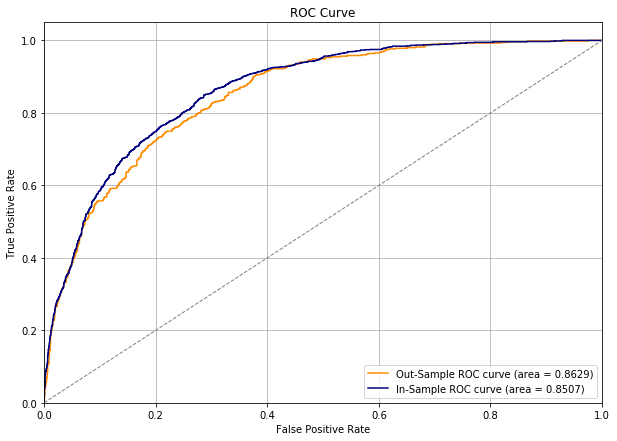